In [176]:
import pandas as pd
import numpy as np
import seaborn as sns

In [177]:
df = pd.read_csv('employee.csv')

# Data Cleaning

In [178]:
df.columns[df.isnull().any()]

Index(['company', 'salary', 'credit_card', 'balance', 'vehicle'], dtype='object')

In [179]:
col = ['company', 'salary', 'credit_card', 'balance', 'vehicle']
df[col].isnull().sum()

# it's not a good process

company        60
salary         59
credit_card    17
balance        39
vehicle        55
dtype: int64

In [180]:
# it's a good way to find actual columns

null = df.columns[df.isnull().any()]
df[null].isnull().sum()

company        60
salary         59
credit_card    17
balance        39
vehicle        55
dtype: int64

In [181]:
# percentage of missing values in each col

for col in df.columns:
    missing_percent = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_percent*100)))

full_name - 0%
gender - 0%
address - 0%
country - 0%
university - 0%
job_title - 0%
company - 6%
salary - 6%
credit_card - 2%
balance - 4%
vehicle - 6%
birthday - 0%
shirt_size - 0%


<AxesSubplot:>

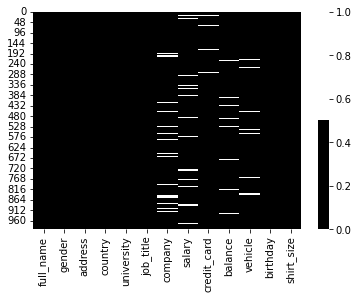

In [182]:
# missing value visualize

cols = df.columns
colors = ['black', 'white']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    1000 non-null   object
 1   gender       1000 non-null   object
 2   address      1000 non-null   object
 3   country      1000 non-null   object
 4   university   1000 non-null   object
 5   job_title    1000 non-null   object
 6   company      940 non-null    object
 7   salary       941 non-null    object
 8   credit_card  983 non-null    object
 9   balance      961 non-null    object
 10  vehicle      945 non-null    object
 11  birthday     1000 non-null   object
 12  shirt_size   1000 non-null   object
dtypes: object(13)
memory usage: 101.7+ KB


we can see that there is no numeric columns. But we know salary and balance col is numeric. so we have to make it numeric.

In [184]:
df[['salary', 'balance']] = df[['salary', 'balance']].replace(r'\$', r'', regex=True)

In [185]:
df['salary'] = df['salary'].str.replace(',','')
df['balance'] = df['balance'].str.replace(',','')

 
# we have to make sure there is no  comma

but still our columns is object datatype. so we have to make it numeric first.

In [186]:
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

 Here is the thing. we can't make it integer because it's still have nan values

In [187]:
median_salary = df['salary'].median()
print(median_salary)

median_balance = df['balance'].median()
print(median_balance)

66477.57
315952.68


In [188]:
# using median we fill our missing gap in salary and balance cols

df['salary'] = df['salary'].fillna(median_salary)

df['balance'] = df['balance'].fillna(median_balance)

In [189]:
# Now we can make it integer column

df['salary']=df['salary'].apply(np.int64)
df['balance']=df['balance'].apply(np.int64)

# Fill text value in Company col

In [190]:
# I have 60 nan values in this column. 
# I decided to use limits to fill our nan values so that we can use multiple values.
# I have divided these 60 null values into 4 parts.

In [191]:
df = df.fillna(value={'company':'Google'}, limit=20)

In [192]:
df=df.fillna(value={'company':'Microsoft'}, limit=10)

In [193]:
df=df.fillna(value={'company':'Facebook'}, limit=12)

In [194]:
df=df.fillna(value={'company':'Apple'}, limit=10)

In [195]:
df=df.fillna(value={'company':'Amazon'}, limit=8)

In [196]:
# Since here our dataset is generated from fake data generating website. So here are the random company names. 
# So I am replacing some of the familiar names for our convenience.

df = df.replace({'company':{'Browsecat':'Netflix', 'Wikizz': 'Intel', 'Pixoboo':'IBM'}})

In [197]:
# See !! 

df['company'].value_counts().head(10)

Google       20
Facebook     12
Microsoft    10
Apple        10
Netflix       8
Amazon        8
Intel         8
IBM           8
Talane        7
Mita          7
Name: company, dtype: int64

## I have filled the null values in the Vehicle column with zeros to keep track of the null values. 

## As we have cleaned our salary column. Now we can use our salary column to remove the zeros and set a more accurate value.


In [198]:
df['vehicle'] = df['vehicle'].fillna('zeroes')

In [199]:
# I divided the salary column into 4 parts 
# 1. 20 to 35
# 2. 35 to 50 
# 3. 50 to 70
# 4. 70 to 90
# 5. 90 to 110

## 20k to 35k

In [200]:
# checking which car has been used more in this range

df[(df['salary'] < 35000) & (df['salary'] >= 20000)]['vehicle'].value_counts().head(10)

Dodge         15
Chevrolet     12
Ford          11
Lincoln        7
Pontiac        7
BMW            6
Mitsubishi     6
GMC            6
zeroes         5
Isuzu          5
Name: vehicle, dtype: int64

In [201]:
# Using our desired condition

condi = [(df['salary'] < 35000) & (df['salary'] >= 20000) & (df['vehicle']=='zeroes')]
values = ['Dodge']
df['vehicle'] = np.select(condi, values, default=df['vehicle'])

In [202]:
# Now check again and BINGO !!

df[(df['salary'] < 35000) & (df['salary'] >= 20000)]['vehicle'].value_counts().head(5)

Dodge        20
Chevrolet    12
Ford         11
Pontiac       7
Lincoln       7
Name: vehicle, dtype: int64

## 35k to 50k

In [203]:
df[(df['salary'] < 50000) & (df['salary'] >= 35000)]['vehicle'].value_counts().head(10)

Ford          15
GMC           10
zeroes         9
Chevrolet      7
Toyota         6
Mazda          6
Lexus          5
Mitsubishi     5
Honda          5
Nissan         4
Name: vehicle, dtype: int64

In [204]:
condi = [(df['salary'] < 50000) & (df['salary'] >= 35000) & (df['vehicle']=='zeroes')]
values = ['Ford']
df['vehicle'] = np.select(condi, values, default=df['vehicle'])

In [205]:
df[(df['salary'] < 50000) & (df['salary'] >= 35000)]['vehicle'].value_counts().head(5)

Ford         24
GMC          10
Chevrolet     7
Toyota        6
Mazda         6
Name: vehicle, dtype: int64

## 50k to 70k

In [206]:
df[(df['salary'] < 70000) & (df['salary'] >= 50000)]['vehicle'].value_counts().head(10)

Ford             25
Chevrolet        18
Dodge            17
Mercedes-Benz    14
Mitsubishi       13
Toyota           13
GMC              12
Pontiac          12
zeroes           11
Honda            11
Name: vehicle, dtype: int64

In [207]:
condi = [(df['salary'] < 70000) & (df['salary'] >= 50000) & (df['vehicle']=='zeroes')]
values = ['Ford']
df['vehicle'] = np.select(condi, values, default=df['vehicle'])

In [208]:
df[(df['salary'] < 70000) & (df['salary'] >= 50000)]['vehicle'].value_counts().head(5)

Ford             36
Chevrolet        18
Dodge            17
Mercedes-Benz    14
Mitsubishi       13
Name: vehicle, dtype: int64

## 70k to 90k

In [209]:
df[(df['salary'] < 90000) & (df['salary'] >= 70000)]['vehicle'].value_counts().head(10)

Chevrolet        17
Ford             15
zeroes           14
Dodge            13
Toyota           13
Mercedes-Benz    11
GMC              10
Volkswagen       10
Lincoln           8
Suzuki            8
Name: vehicle, dtype: int64

In [210]:
condi = [(df['salary'] < 90000) & (df['salary'] >= 70000) & (df['vehicle']=='zeroes')]
values = ['Chevrolet']
df['vehicle'] = np.select(condi, values, default=df['vehicle'])

In [211]:
df[(df['salary'] < 90000) & (df['salary'] >= 70000)]['vehicle'].value_counts().head(5)

Chevrolet        31
Ford             15
Dodge            13
Toyota           13
Mercedes-Benz    11
Name: vehicle, dtype: int64

## 90k to 110k

In [212]:
df[(df['salary'] < 110000) & (df['salary'] >= 90000)]['vehicle'].value_counts().head(10)

GMC           17
Ford          17
zeroes        16
Dodge         15
Volkswagen    13
Chevrolet     10
Toyota         9
Mitsubishi     7
Pontiac        6
BMW            6
Name: vehicle, dtype: int64

In [213]:
condi = [(df['salary'] < 110000) & (df['salary'] >= 90000) & (df['vehicle']=='zeroes')]
values = ['Volkswagen']
df['vehicle'] = np.select(condi, values, default=df['vehicle'])

In [214]:
df[(df['salary'] < 110000) & (df['salary'] >= 90000)]['vehicle'].value_counts().head(5)

Volkswagen    29
GMC           17
Ford          17
Dodge         15
Chevrolet     10
Name: vehicle, dtype: int64

## Now in the same way I will also fill the credit card column

In [215]:
df['credit_card'] = df['credit_card'].fillna('zeroes')

In [216]:
df['credit_card'].value_counts()

visa-electron      163
visa               156
instapayment       143
mastercard         141
solo               132
bankcard           127
americanexpress    121
zeroes              17
Name: credit_card, dtype: int64

In [217]:
df[df['credit_card']=='zeroes'].sort_values(by='salary').head(2)

# actually I checked before I emplement the process. 
# I checked the minimum salary 

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
759,Hedvig Murby,M,06398 Karstens Road,United States,Milwaukee School of Engineering,Quality Control Specialist,Facebook,30857,zeroes,315952,Honda,15/09/1997,S
460,Shaine Sandilands,M,184 Maple Junction,Croatia,University of Zadar,Director of Sales,Digitube,31479,zeroes,460101,Mercedes-Benz,17/08/1997,M


## 30k to 50k

In [218]:
df[(df.salary >= 30000) & (df.salary < 50000)]['credit_card'].value_counts()

instapayment       33
visa-electron      33
bankcard           27
mastercard         26
visa               25
solo               18
americanexpress    15
zeroes              3
Name: credit_card, dtype: int64

In [219]:
condi = [(df.salary < 50000) & (df.salary >= 30000) & (df.credit_card=='zeroes')]
values = ['visa-electron']
df['credit_card'] = np.select(condi, values, default=df['credit_card'])

In [220]:
df[(df.salary >= 30000) & (df.salary < 50000)]['credit_card'].value_counts()

visa-electron      36
instapayment       33
bankcard           27
mastercard         26
visa               25
solo               18
americanexpress    15
Name: credit_card, dtype: int64

## 50k to 70k

In [221]:
df[(df.salary >= 50000) & (df.salary < 70000)]['credit_card'].value_counts()

mastercard         45
americanexpress    45
visa               44
solo               42
instapayment       39
visa-electron      38
bankcard           35
zeroes              5
Name: credit_card, dtype: int64

In [222]:
condi = [(df.salary < 70000) & (df.salary >= 50000) & (df.credit_card=='zeroes')]
values = ['mastercard']
df['credit_card'] = np.select(condi, values, default=df['credit_card'])

In [223]:
df[(df.salary >= 50000) & (df.salary < 70000)]['credit_card'].value_counts()


mastercard         50
americanexpress    45
visa               44
solo               42
instapayment       39
visa-electron      38
bankcard           35
Name: credit_card, dtype: int64

## 70k to 90k

In [224]:
df[(df.salary >= 70000) & (df.salary < 90000)]['credit_card'].value_counts()

visa               38
visa-electron      36
solo               34
americanexpress    29
mastercard         29
instapayment       28
bankcard           24
zeroes              5
Name: credit_card, dtype: int64

In [225]:
condi = [(df.salary >= 70000) & (df.salary < 90000) & (df.credit_card=='zeroes')]
values = ['visa']
df['credit_card'] = np.select(condi, values, default=df['credit_card'])

In [226]:
df[(df.salary >= 70000) & (df.salary < 90000)]['credit_card'].value_counts()

visa               43
visa-electron      36
solo               34
americanexpress    29
mastercard         29
instapayment       28
bankcard           24
Name: credit_card, dtype: int64

## 90k to 110k

In [227]:
df[(df.salary >= 90000) & (df.salary <= 110000)]['credit_card'].value_counts()

visa               36
visa-electron      35
instapayment       30
bankcard           27
solo               26
mastercard         25
americanexpress    21
zeroes              4
Name: credit_card, dtype: int64

In [228]:
condi = [(df.salary >= 90000) & (df.salary <= 110000) & (df.credit_card=='zeroes')]
values = ['visa']
df['credit_card'] = np.select(condi, values, default=df['credit_card'])

In [229]:
df[(df.salary >= 90000) & (df.salary <= 110000)]['credit_card'].value_counts()

visa               40
visa-electron      35
instapayment       30
bankcard           27
solo               26
mastercard         25
americanexpress    21
Name: credit_card, dtype: int64

# Our data cleaning journey in an end